# Vluchtenanalyse
In dit Jupyter Notebook ga je een dataset van vluchten opschonen, en ontbrekende gegevens aanvullen in een dataset van luchthavens. Later in het level ga je deze datasets linken en plotten op een kaart.

## 1. Data inlezen
Lees de aangeleverde data in met pandas. Krijg een indruk van de data door de head te bekijken en het aantal datapunten te printen.

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import pandas as pd

We beginnen met het bestand `flights_usa.csv`.

In [151]:
dfFlights = pd.read_csv("flights_usa.csv")
dfAirports = pd.read_csv("airports_usa.csv")

## 2. Data cleaning

De datasets bevatten momenteel gebrekkige data waar je niet mee kunt werken. Dus ga je ontbrekende gegevens aanvullen, en incomplete data verwijderen.

In [152]:
bestemming = dfFlights.DESTINATION_AIRPORT
percentage = (bestemming.isna().sum() / len(dfFlights) * 100).round(2)
print("Percentage ontbrekende aankomstvliegvelden:", percentage,"%")

dfFlights.dropna(subset=['DESTINATION_AIRPORT'],inplace=True)
bestemmingClean = len(dfFlights)
NotCancelled = (dfFlights['CANCELLED']!= 0).sum()
print("Aantal vluchten na cleaning:", bestemmingClean - NotCancelled)

Percentage ontbrekende aankomstvliegvelden: 4.21 %
Aantal vluchten na cleaning: 105621


In [153]:
dfAirports[['AIRPORT', 'LONGITUDE', 'LATITUDE']].isna().drop_duplicates()
print(dfAirports.loc[[276]])
dfAirports.at[276, 'LATITUDE'] = -37.615223
dfAirports.at[276, 'LONGITUDE'] = -122.389977
print(dfAirports.loc[[276]])

    IATA_CODE                              AIRPORT           CITY STATE  \
276       SFO  San Francisco International Airport  San Francisco    CA   

    COUNTRY  LATITUDE  LONGITUDE  
276     USA       NaN        NaN  
    IATA_CODE                              AIRPORT           CITY STATE  \
276       SFO  San Francisco International Airport  San Francisco    CA   

    COUNTRY   LATITUDE   LONGITUDE  
276     USA -37.615223 -122.389977  


## 3. Data linken

Exercise 3: combineer de twee datasets.

In [154]:
dfFlights.head()
FlightAantal = dfFlights.DESTINATION_AIRPORT.value_counts()
Result = dfAirports.set_index('IATA_CODE').join(FlightAantal).dropna()
Result = Result.rename(columns={"count": "ARRIVALS"})
Result

,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,ARRIVALS
IATA_CODE,,,,,,,
ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.640440,-84.426940,18351.0
AUS,Austin-Bergstrom International Airport,Austin,TX,USA,30.194530,-97.669870,2287.0
BET,Bethel Airport,Bethel,AK,USA,60.779780,-161.838000,46.0
BOI,Boise Airport (Boise Air Terminal),Boise,ID,USA,43.564440,-116.222780,601.0
BOS,Gen. Edward Lawrence Logan International Airport,Boston,MA,USA,42.364350,-71.005180,5610.0
DEN,Denver International Airport,Denver,CO,USA,39.858410,-104.667000,10208.0
HNL,Honolulu International Airport,Honolulu,HI,USA,21.318690,-157.922410,2325.0
JFK,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.639750,-73.778930,4831.0
LAS,McCarran International Airport,Las Vegas,NV,USA,36.080360,-115.152330,6934.0


## 4. Visualiseren op de kaart
Exercise 4: gebruik geopandas en seaborn om de gecombineerde data te plotten op een kaart.

In [155]:
world = geopandas.read_file("worldmap.shp")
countries_to_include = ["Canada", "United States of America", "Mexico"]
filtered_world = world[world['SOVEREIGNT'].isin(countries_to_include)]

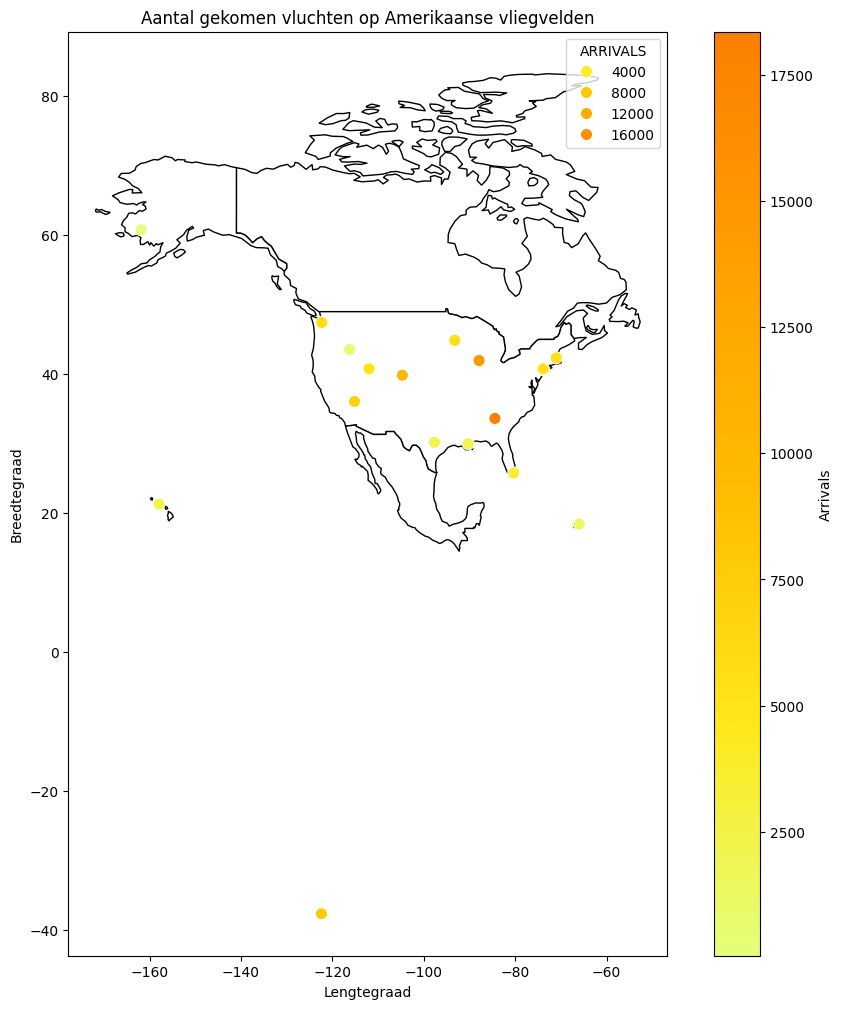

In [156]:
f, ax = plt.subplots(1, figsize=(12, 12))
filtered_world.plot(color='white', edgecolor='black', ax=ax)
x = Result.LONGITUDE
y = Result.LATITUDE
sns.scatterplot(data=Result, x=x, y=y, hue= 'ARRIVALS', palette='Wistia', s=75)
norm = plt.Normalize(Result['ARRIVALS'].min(), Result['ARRIVALS'].max())
sm = plt.cm.ScalarMappable(cmap="Wistia", norm=norm)
sm.set_array([])
f.colorbar(sm, ax=ax, label='Arrivals')
plt.xlabel('Lengtegraad')
plt.ylabel('Breedtegraad')
plt.title('Aantal gekomen vluchten op Amerikaanse vliegvelden')
plt.show()